In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob

# Chemin vers les fichiers CSV dans ton Google Drive
chemin = "/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/*.csv"

In [3]:
# Liste tous les fichiers CSV dans le dossier
fichiers = glob.glob("/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/*.csv")

In [4]:
# Affiche la liste des fichiers trouvés
for f in fichiers:
    print(f)

/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/Pikine_meteo.csv
/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/Thies_meteo.csv
/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/RichardToll_meteo.csv
/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/Diourbel1_meteo.csv
/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/Diourbel2_meteo.csv
/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/Ouakam_meteo.csv
/content/drive/MyDrive/Boosso_2024/Gestion_Projet/Données_Meteo/SaintLouis_meteo.csv


In [5]:
# Liste pour stocker les DataFrames
dataframes = []

# Charger chaque fichier et y ajouter une colonne "station" (nom du fichier sans l'extension)
for fichier in fichiers:
    df = pd.read_csv(fichier)
    nom_station = fichier.split("/")[-1].replace(".csv", "")
    df["station"] = nom_station
    dataframes.append(df)

In [6]:
# Fusionner tous les DataFrames
df_final = pd.concat(dataframes, ignore_index=True)

In [7]:
# Afficher un aperçu
df_final.head(10)

,time,temperature_2m,relative_humidity_2m,pressure_msl,windspeed_10m,station
0,2024-01-01 00:00:00,24.1,59.0,1013.8,21.4,Pikine_meteo
1,2024-01-01 01:00:00,23.5,64.0,1013.9,20.7,Pikine_meteo
2,2024-01-01 02:00:00,23.2,65.0,1013.6,20.7,Pikine_meteo
3,2024-01-01 03:00:00,23.0,72.0,1013.2,20.1,Pikine_meteo
4,2024-01-01 04:00:00,22.8,76.0,1012.6,19.6,Pikine_meteo
5,2024-01-01 05:00:00,22.7,75.0,1012.4,19.4,Pikine_meteo
6,2024-01-01 06:00:00,22.4,77.0,1012.6,19.2,Pikine_meteo
7,2024-01-01 07:00:00,22.2,77.0,1012.8,18.4,Pikine_meteo
8,2024-01-01 08:00:00,22.3,73.0,1013.2,17.8,Pikine_meteo
9,2024-01-01 09:00:00,23.8,58.0,1013.8,17.5,Pikine_meteo


In [8]:
# Optionnel : enregistrer le fichier fusionné
df_final.to_csv("/content/drive/MyDrive/Boosso_2024/Gestion_Projet/donnees_meteo_fusionnees.csv", index=False)

In [9]:
# Dimension
df_final.shape

(85512, 6)

In [10]:
# Type
df_final.dtypes

,0
time,object
temperature_2m,float64
relative_humidity_2m,float64
pressure_msl,float64
windspeed_10m,float64
station,object


In [11]:
# Statistiques descriptives
df_final.describe()

,temperature_2m,relative_humidity_2m,pressure_msl,windspeed_10m
count,85183.000000,85183.000000,85183.000000,85183.000000
mean,26.219984,53.706127,1011.922893,15.419267
std,4.997531,25.854795,2.079521,6.222527
min,13.600000,4.000000,1002.700000,0.000000
25%,22.600000,30.000000,1010.600000,11.100000
50%,25.700000,57.000000,1012.000000,14.900000
75%,29.000000,77.000000,1013.400000,19.300000
max,44.800000,100.000000,1019.800000,53.600000


In [12]:
# Vlaur manquante
df_final.isnull().sum()

,0
time,0
temperature_2m,329
relative_humidity_2m,329
pressure_msl,329
windspeed_10m,329
station,0


In [13]:
# Vérification des lignes sont concernées
df_final[df_final[['temperature_2m', 'relative_humidity_2m', 'pressure_msl', 'windspeed_10m']].isnull().any(axis=1)].shape

(329, 6)

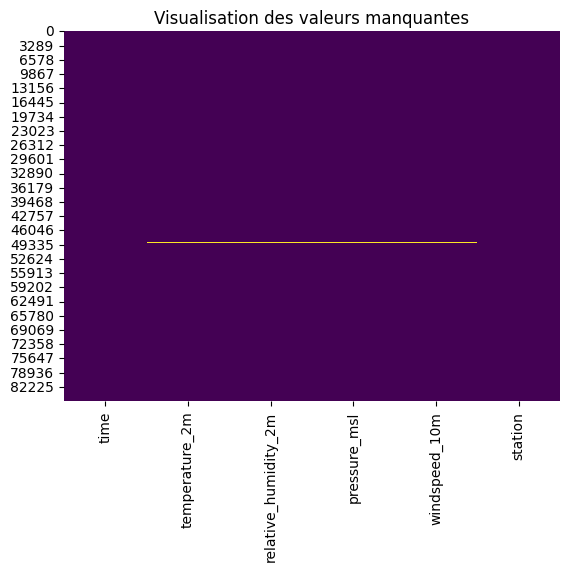

In [14]:
#
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisation des valeurs manquantes")
plt.show()



In [15]:
#  Suppression des lignes avec valeurs manquantes
df_clean = df_final.dropna()

In [16]:
# taille apres suppression
df_clean.shape

(85183, 6)

<ipython-input-23-57fa3fd95131>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time'] = pd.to_datetime(df_clean['time'])
<ipython-input-23-57fa3fd95131>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = df_clean['time'].dt.date


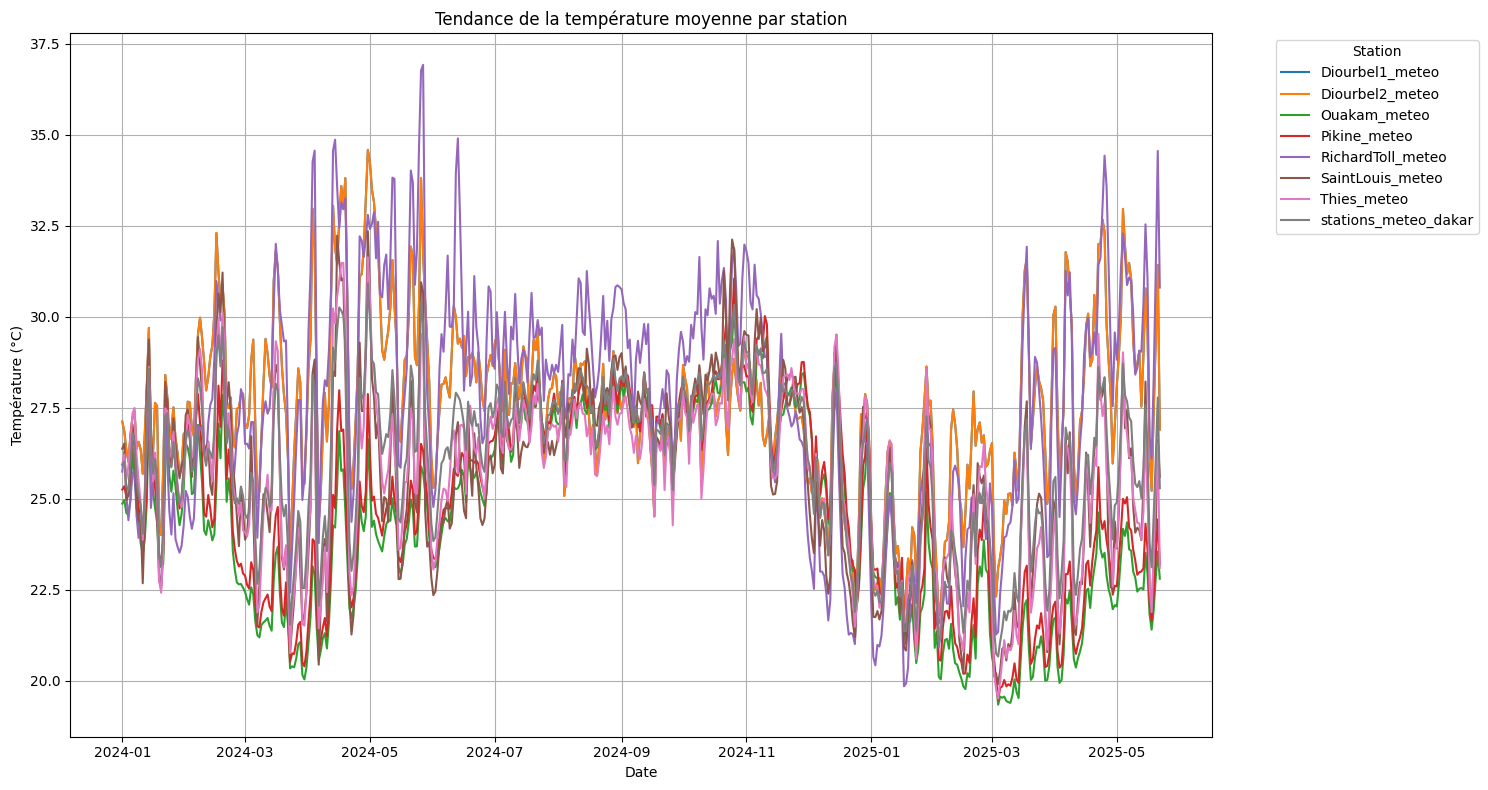

In [23]:
import matplotlib.pyplot as plt

# Conversion de la colonne time
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['date'] = df_clean['time'].dt.date

# Moyenne quotidienne par station
df_temp = df_clean.groupby(['station', 'date'])['temperature_2m'].mean().reset_index()

# Liste de toutes les stations
stations = df_temp['station'].unique()

plt.figure(figsize=(15, 8))

for station in stations:
    subset = df_temp[df_temp['station'] == station]
    plt.plot(subset['date'], subset['temperature_2m'], label=station)

plt.title("Tendance de la température moyenne par station")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-17-29ad50067033>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time'] = pd.to_datetime(df_clean['time'])
<ipython-input-17-29ad50067033>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = df_clean['time'].dt.date


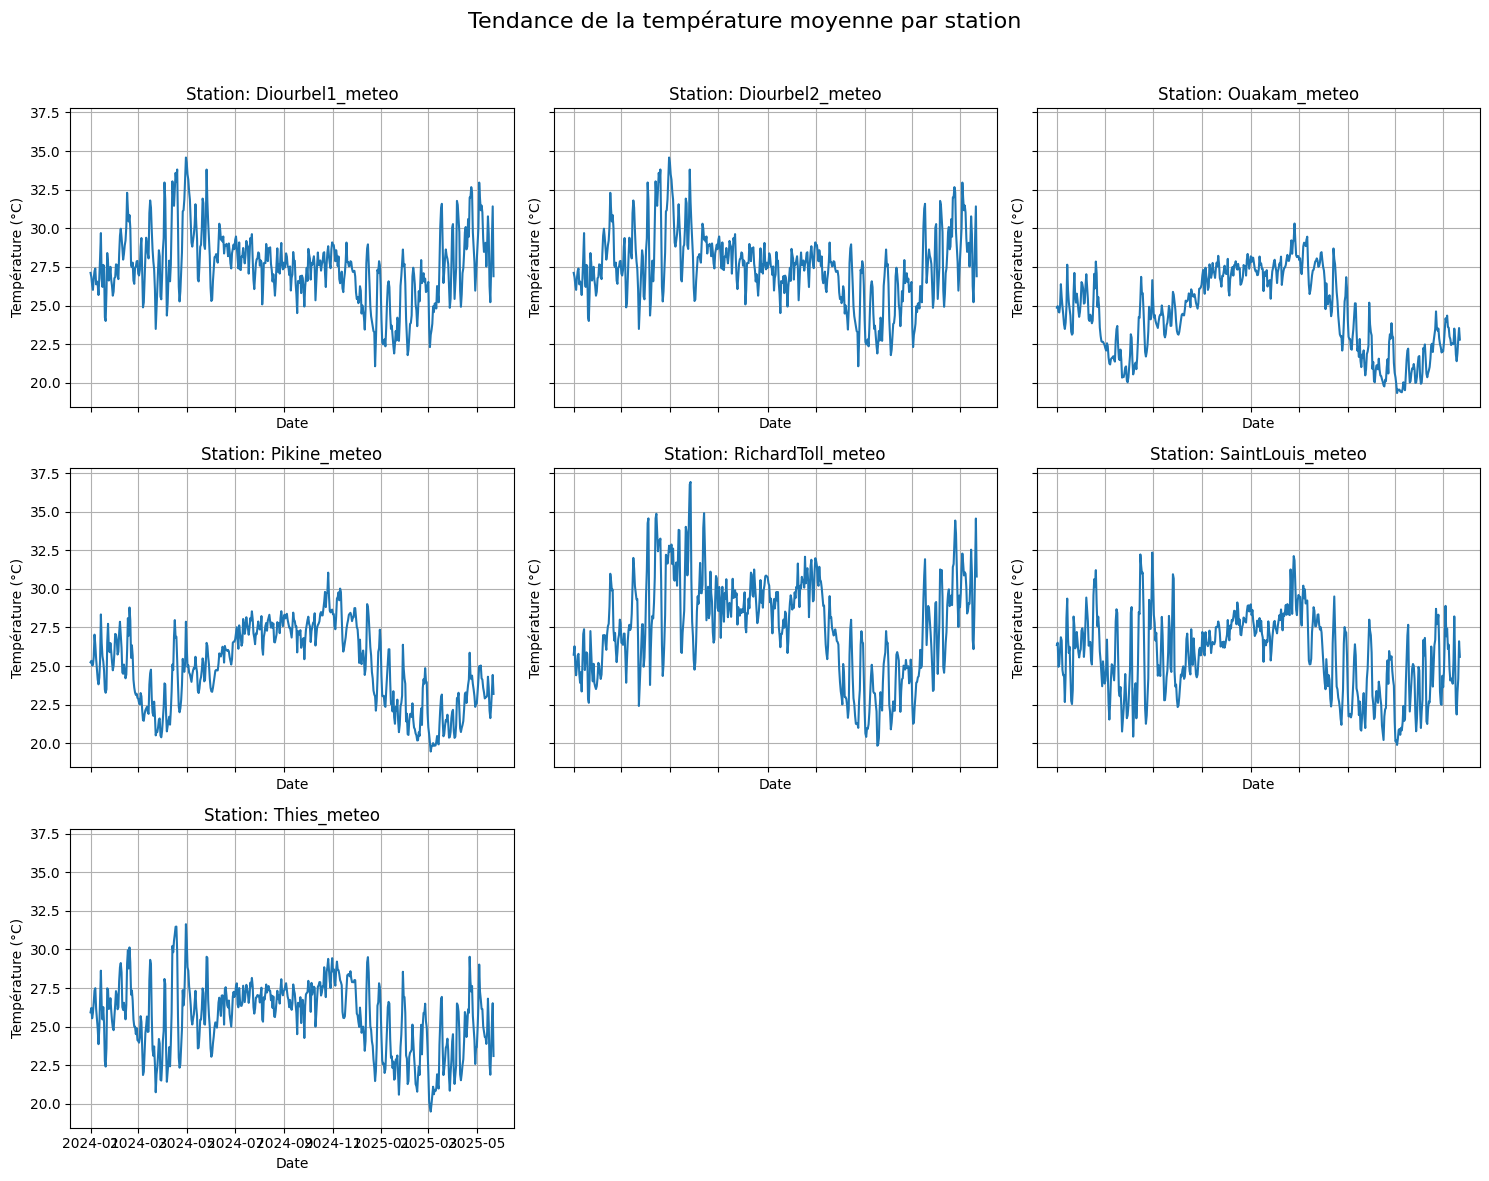

In [17]:
import matplotlib.pyplot as plt
import math

# Assurer que les colonnes sont bien formatées
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['date'] = df_clean['time'].dt.date

# Moyenne quotidienne par station
df_temp = df_clean.groupby(['station', 'date'])['temperature_2m'].mean().reset_index()

# Liste des stations
stations = df_temp['station'].unique()
nb_stations = len(stations)

# Définir le nombre de lignes et colonnes pour les subplots
cols = 3  # Nombre de colonnes de graphiques (modifiable)
rows = math.ceil(nb_stations / cols)

fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axs = axs.flatten()  # Aplatir les axes pour boucle simple

# Boucle sur chaque station
for i, station in enumerate(stations):
    subset = df_temp[df_temp['station'] == station]
    axs[i].plot(subset['date'], subset['temperature_2m'], color='tab:blue')
    axs[i].set_title(f"Station: {station}")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Température (°C)")
    axs[i].grid(True)

# Supprimer les axes vides si nb_stations < rows * cols
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle("Tendance de la température moyenne par station", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de l’espace pour le titre
plt.show()


In [18]:
# Analyse des extrêmes
# Objectif : Identifier les températures maximales, humidités minimales, etc.
# Température max par station
temp_max = df_clean.groupby('station')['temperature_2m'].max()
print("Températures maximales par station :\n", temp_max)

# Humidité minimale
humidity_min = df_clean.groupby('station')['relative_humidity_2m'].min()
print("Humidité relative minimale par station :\n", humidity_min)


Températures maximales par station :
 station
Diourbel1_meteo      44.8
Diourbel2_meteo      44.8
Ouakam_meteo         36.1
Pikine_meteo         38.0
RichardToll_meteo    44.7
SaintLouis_meteo     41.0
Thies_meteo          43.2
Name: temperature_2m, dtype: float64
Humidité relative minimale par station :
 station
Diourbel1_meteo      5.0
Diourbel2_meteo      5.0
Ouakam_meteo         8.0
Pikine_meteo         7.0
RichardToll_meteo    5.0
SaintLouis_meteo     4.0
Thies_meteo          5.0
Name: relative_humidity_2m, dtype: float64


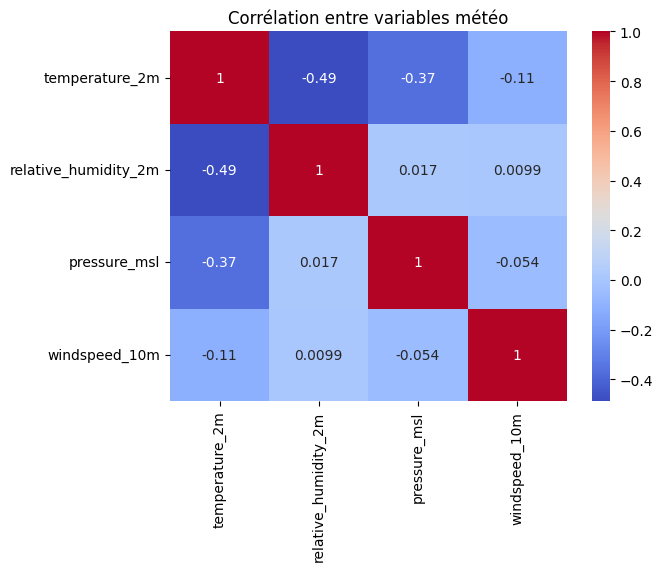

In [19]:
import seaborn as sns

# Corrélation globale
corr = df_clean[['temperature_2m', 'relative_humidity_2m', 'pressure_msl', 'windspeed_10m']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables météo")
plt.show()


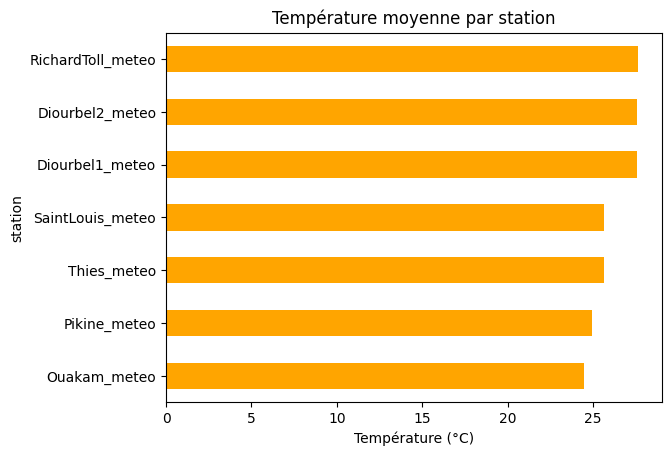

In [20]:
# Comparaison des stations
# Température moyenne par station
df_clean.groupby('station')['temperature_2m'].mean().sort_values().plot(kind='barh', color='orange')
plt.title("Température moyenne par station")
plt.xlabel("Température (°C)")
plt.show()

In [21]:
# Jour le plus chaud et plus humide par station
# Température maximale par station
jour_plus_chaud = df_clean.loc[df_clean.groupby("station")["temperature_2m"].idxmax()][['station', 'time', 'temperature_2m']]
print(jour_plus_chaud)

# Humidité maximale
jour_plus_humide = df_clean.loc[df_clean.groupby("station")["relative_humidity_2m"].idxmax()][['station', 'time', 'relative_humidity_2m']]
print(jour_plus_humide)


                 station                time  temperature_2m
40169    Diourbel1_meteo 2024-05-26 17:00:00            44.8
52385    Diourbel2_meteo 2024-05-26 17:00:00            44.8
62270       Ouakam_meteo 2024-02-19 14:00:00            36.1
1190        Pikine_meteo 2024-02-19 14:00:00            38.0
27976  RichardToll_meteo 2024-05-27 16:00:00            44.7
75831   SaintLouis_meteo 2024-04-15 15:00:00            41.0
14704        Thies_meteo 2024-04-13 16:00:00            43.2
                 station                time  relative_humidity_2m
42868    Diourbel1_meteo 2024-09-16 04:00:00                 100.0
55084    Diourbel2_meteo 2024-09-16 04:00:00                 100.0
62664       Ouakam_meteo 2024-03-07 00:00:00                  95.0
1585        Pikine_meteo 2024-03-07 01:00:00                  96.0
24919  RichardToll_meteo 2024-01-21 07:00:00                  99.0
79831   SaintLouis_meteo 2024-09-29 07:00:00                  98.0
19301        Thies_meteo 2024-10-22 05:00:0